In [9]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

from astropy.coordinates import SkyCoord
from astropy.time import Time
import astropy.units as u
from astroplan import FixedTarget, Observer

target_name = 'KIC 9652680'

utc_offset = 6*u.hour # http://www.timeanddate.com/time/zones/mdt
# Schedule: http://35m-schedule.apo.nmsu.edu/2016-05-29.1/html/days/2016-05-31.html
time_start_local_time = Time('2016-07-02 02:16')
time_end_local_time = Time('2016-07-02 05:51')

observer = Observer.at_site('APO')

time_start_utc = time_start_local_time + utc_offset
time_end_utc = time_end_local_time + utc_offset

target = FixedTarget.from_name(target_name)

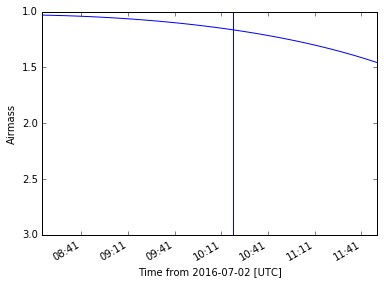

In [10]:
from astroplan.plots import plot_airmass

obs_times = Time(np.linspace(time_start_utc.jd, time_end_utc.jd, 30), format='jd')
ax = plot_airmass(target, observer, obs_times)
morning_twilight_astro = observer.twilight_morning_astronomical(time_end_utc)
ax.axvline(morning_twilight_astro.plot_date)
plt.show()

In [66]:
#flux_standard_1 = FixedTarget.from_name('Wolf 1346') # DA
#flux_standard_2 = FixedTarget.from_name('Hip 92865') # O8:Vnn <-  don't use this, it's a semi-detached EB
#flux_standard_2 = FixedTarget.from_name('LDS749B') #  DB4 
flux_standard_3 = FixedTarget.from_name('BD+28 4211') # Op
telluric_standard_1 = FixedTarget.from_name('HR6943') # B8V
kic124 = FixedTarget.from_name('KIC 12418816')
hat11 = FixedTarget.from_name('HAT-P-11')
rv_standard = FixedTarget.from_name('HR 7258') # RV standard 

In [67]:
telluric_standard_1.coord.to_string('hmsdms', sep=":")

'18:29:35.7103 +23:51:58.3234'

In [68]:
mdwarf = FixedTarget.from_name('GJ 4053')
target.coord, mdwarf.coord

(<SkyCoord (ICRS): (ra, dec) in deg
     (293.27320417, 46.31905)>, <SkyCoord (ICRS): (ra, dec) in deg
     (274.738575, 66.192558)>)

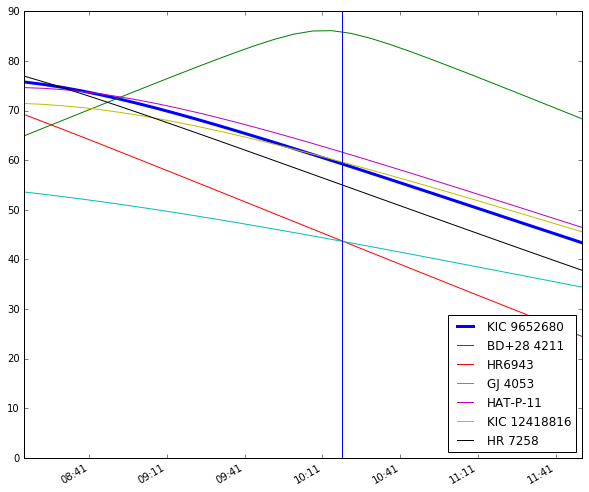

In [69]:
target_altaz = observer.altaz(obs_times, target)
#standard1_altaz = observer.altaz(obs_times, flux_standard_1)
#standard2_altaz = observer.altaz(obs_times, flux_standard_2)
standard3_altaz = observer.altaz(obs_times, flux_standard_3)
standard4_altaz = observer.altaz(obs_times, telluric_standard_1)

rvstandard_altaz = observer.altaz(obs_times, rv_standard)


hat11_altaz = observer.altaz(obs_times, hat11)
kic124_altaz = observer.altaz(obs_times, kic124)


mdwarf_altaz = observer.altaz(obs_times, mdwarf)

plt.figure(figsize=(10, 8))
plt.plot_date(obs_times.plot_date, target_altaz.alt, lw=3,
              ls='-', marker=None, label=target.name)

# plt.plot_date(obs_times.plot_date, standard1_altaz.alt, 
#               label=flux_standard_1.name, ls='-', marker=None)
# plt.plot_date(obs_times.plot_date, standard2_altaz.alt, 
#               label=flux_standard_2.name, ls='-', marker=None)
plt.plot_date(obs_times.plot_date, standard3_altaz.alt, 
             label=flux_standard_3.name, ls='-', marker=None)
plt.plot_date(obs_times.plot_date, standard4_altaz.alt, 
             label=telluric_standard_1.name, ls='-', marker=None)
plt.plot_date(obs_times.plot_date, mdwarf_altaz.alt, 
             label=mdwarf.name, ls='-', marker=None)

plt.plot_date(obs_times.plot_date, hat11_altaz.alt, 
             label=hat11.name, ls='-', marker=None)
plt.plot_date(obs_times.plot_date, kic124_altaz.alt, 
             label=kic124.name, ls='-', marker=None)
plt.plot_date(obs_times.plot_date, rvstandard_altaz.alt, 
             label=rv_standard.name, ls='-', marker=None)

plt.axvline(morning_twilight_astro.plot_date)

# Format the time axis
from matplotlib import dates
ax = plt.gca()
date_formatter = dates.DateFormatter('%H:%M')
ax.xaxis.set_major_formatter(date_formatter)
plt.setp(ax.get_xticklabels(), rotation=30, ha='right')

plt.ylim([0, 90])
plt.legend(loc='lower right')

In [70]:
stars = [target, flux_standard_3, telluric_standard_1, hat11, kic124, rv_standard]

for star in stars: 
    print('{0} {1}'.format(star.name.ljust(15), star.coord.to_string('hmsdms', sep=':')))

KIC 9652680     19:33:05.569 +46:19:08.58
BD+28 4211      21:51:11.0214 +28:51:50.3565
HR6943          18:29:35.7103 +23:51:58.3234
HAT-P-11        19:50:50.2477 +48:04:51.0873
KIC 12418816    19:45:46.062 +51:13:27.5628
HR 7258         19:06:17.036 +41:24:49.6138


In [8]:
"""
;%%%%%%%%%%%% Echelle %%%%%%%%%%%%%%%%%
; this is extrapolated from a summary of John W. data
; V = 3.86, 8k counts in 30sec => c = 9.93
;
; let's try w/ data from Adam (via John)
; V = 1.9 (B3V), t=4sec, 12,000 peak counts => c=10.59
; V = 11.2(GV), t=1200s, 2250 peak counts => c=11.88
if inst eq 'echelle' then begin
   print,'Echelle: '+strtrim(string(mag),2)+' mag'
   echelle_c = 11.88;10.59
   echelle_flux = 10d0^((mag-echelle_c)/(-2.5))
   exptime = s2n^2./echelle_flux
   print,'t = ',exptime,' sec'
   return
endif
"""

def etc(s2n, mag):
    # Very rough ETC: 
    echelle_c = 11.88# ;10.59
    echelle_flux = 10**((mag-echelle_c)/(-2.5))
    exptime = s2n**2./echelle_flux
    return exptime

etc(50, 11)/60

18.52630281121285

### Plan

Cals: 
* Biases, 5-7. 
* Blue flats, 5-7, 200 s exposure with the quartz lamp and the blue filter.
* Red flats, 5-7, 7 s exposure with  the quartz lamp and no filter.
* ThAr, 30 s exposure.  I always take one at the beginning and one at the end of the night, but if you had a long half night or if you wanted very accurate velocities you would want to take at least one more in the middle of the night.

On sky:
* Hip 92865 (

In [ ]:
(observer.twilight_morning_astronomical(Time.now()) - Time.now()).to(u.min)

In [57]:
def mag_to_flux(m1, m2):
    return 10**(0.2 * (m1 - m2))

mag_to_flux(10.5, 5.8)

8.709635899560807

In [60]:
30000/8

3750.0